# Check whether there are weird values in interpolated fields:

In [5]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
import xarray as xr
from datetime import date

%matplotlib inline

###### Parameters:

In [6]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800
isize = imax - imin
jsize = jmax - jmin

# interpolated files:
year   = 2002
folder = '/data/brogalla/ANHA4/'

###### Load files:

In [7]:
ref   = xr.open_dataset(f"/data/brogalla/run_storage/Mn-reference-202103/ref-2003-202103/ANHA12_EXH006_2003_monthly.nc")
lons  = ref['nav_lon'].values
lats  = ref['nav_lat'].values
depth = ref['deptht'].values

In [8]:
fileT = xr.open_dataset(f'{folder}ANHA4-EXH005_5d_gridT_y2002m01d05.nc')
fileU = xr.open_dataset(f'{folder}ANHA4-EXH005_5d_gridU_y2002m01d05.nc')
fileV = xr.open_dataset(f'{folder}ANHA4-EXH005_5d_gridV_y2002m01d05.nc')
fileW = xr.open_dataset(f'{folder}ANHA4-EXH005_5d_gridW_y2002m01d05.nc')
fileI = xr.open_dataset(f'{folder}ANHA4-EXH005_5d_icemod_y2002m01d05.nc')

votemper = fileT['votemper'][0,:,:,:].values
vosaline = fileT['vosaline'][0,:,:,:].values
somxl010 = fileT['somxl010'][0,:,:].values
vozocrtx = fileU['vozocrtx'][0,:,:,:].values
vomecrty = fileV['vomecrty'][0,:,:,:].values
vovecrtz = fileW['vovecrtz'][0,:,:,:].values
votkeavt = fileW['votkeavt'][0,:,:,:].values
iiceprod = fileI['iiceprod'][0,:,:].values
iicesflx = fileI['iicesflx'][0,:,:].values
ileadfra = fileI['ileadfra'][0,:,:].values
iwinstru = fileI['iwinstru'][0,:,:].values

In [23]:
print(np.sum(np.isnan(votemper))) #
print(np.sum(np.isnan(vosaline))) #
print(np.sum(np.isnan(somxl010)))
print(np.sum(np.isnan(vozocrtx))) #
print(np.sum(np.isnan(vomecrty))) #
print(np.sum(np.isnan(vovecrtz))) #
print(np.sum(np.isnan(votkeavt))) #
print(np.sum(np.isnan(iiceprod)))
print(np.sum(np.isnan(iicesflx)))
print(np.sum(np.isnan(ileadfra)))
print(np.sum(np.isnan(iwinstru)))

14896448
14896448
0
14915069
14920360
14898941
14896448
0
0
0
0


In [9]:
mask      = xr.open_dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
tmask     = mask['tmask'][0,:,imin:imax,jmin:jmax].values
land_mask = np.ma.masked_where((tmask[:,:,:] > 0.1), tmask[:,:,:]) 

##### Functions:

In [10]:
def plot_layer(layer, variable):#, vmin=0,vmax=35):
    try:
        plot_var = variable[layer,imin:imax,jmin:jmax]
    except:
        plot_var = variable[imin:imax,jmin:jmax]
    
#     fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference2.pickle','rb'))
#     fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/nares-zoom.pickle','rb'))
    fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/lancaster-zoom.pickle','rb'))

    x, y = proj1(lons, lats)

    contour = proj1.contourf(x, y, plot_var, cmap=cmocean.cm.thermal) #np.arange(vmin,vmax+1,1),\
#                              cmap=cmocean.cm.thermal, vmin=vmin, vmax=vmax, extend='both')

    cbar_ax = fig.add_axes([0.72, 0.14, 0.04, 0.6])
    cbar    = fig.colorbar(contour, cax=cbar_ax)#, ticks=np.arange(0,35,5))#[0,2,4,6,8,10,12])
    cbar_ax.tick_params(axis='both', which='major', labelsize=8)
    
    figure = plt.gcf()
    figure.set_size_inches(4.5*3.5, 3.7*2.5)
    
    return

##### Figures of surface concentrations:

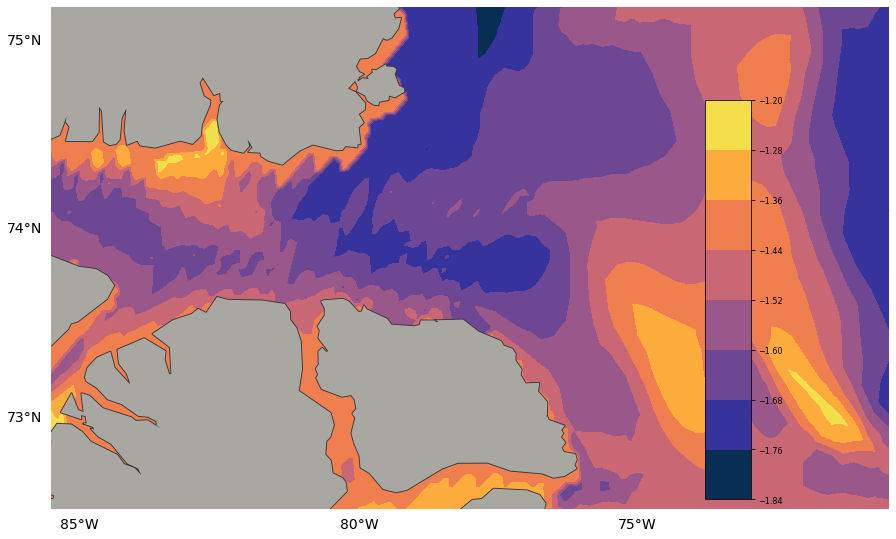

In [11]:
plot_layer(16,votemper)

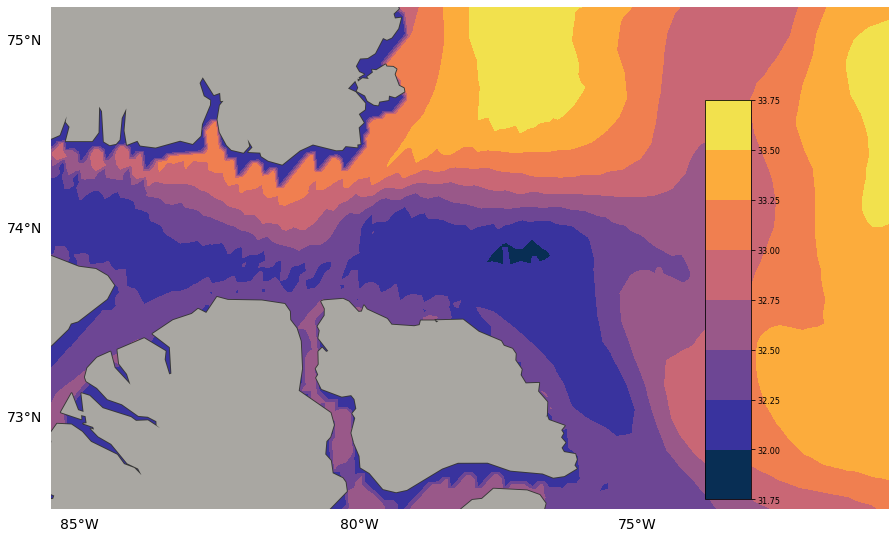

In [12]:
plot_layer(16,vosaline)

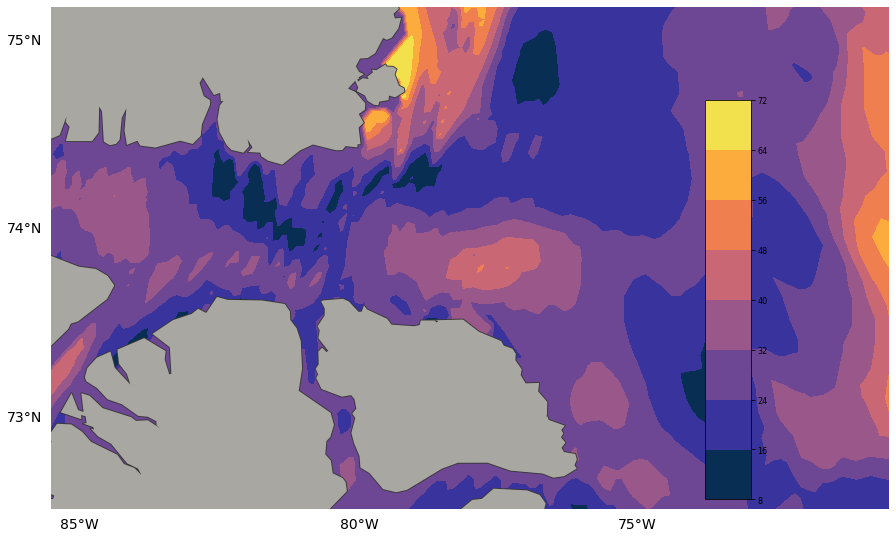

In [13]:
plot_layer(16,somxl010)

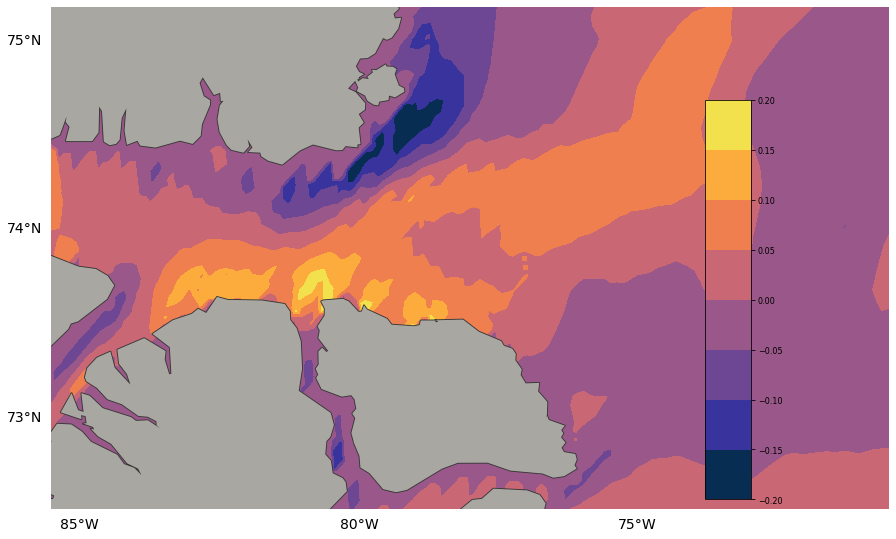

In [14]:
plot_layer(16,vozocrtx)

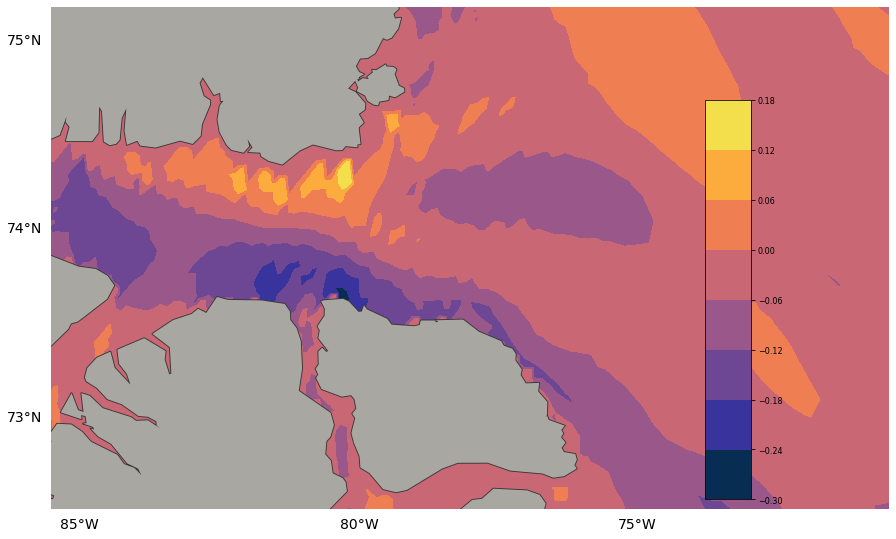

In [15]:
plot_layer(16,vomecrty)

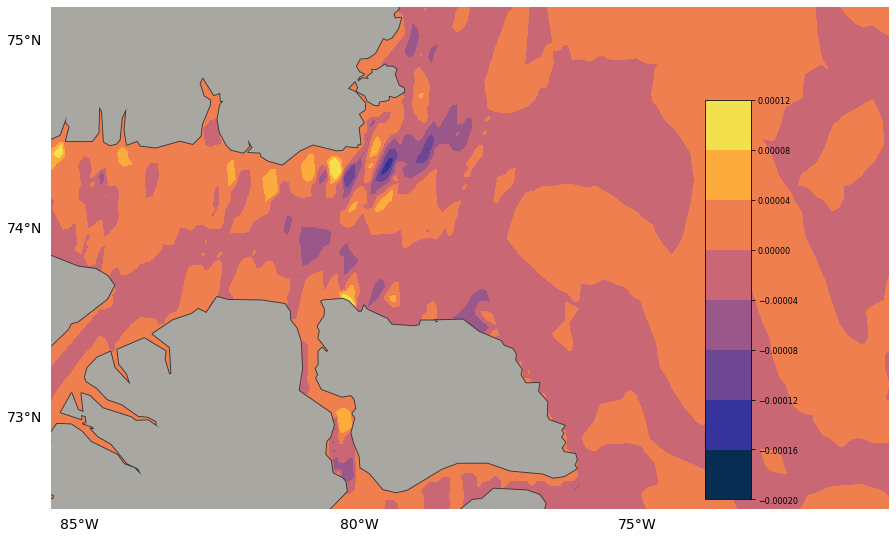

In [16]:
plot_layer(16,vovecrtz)

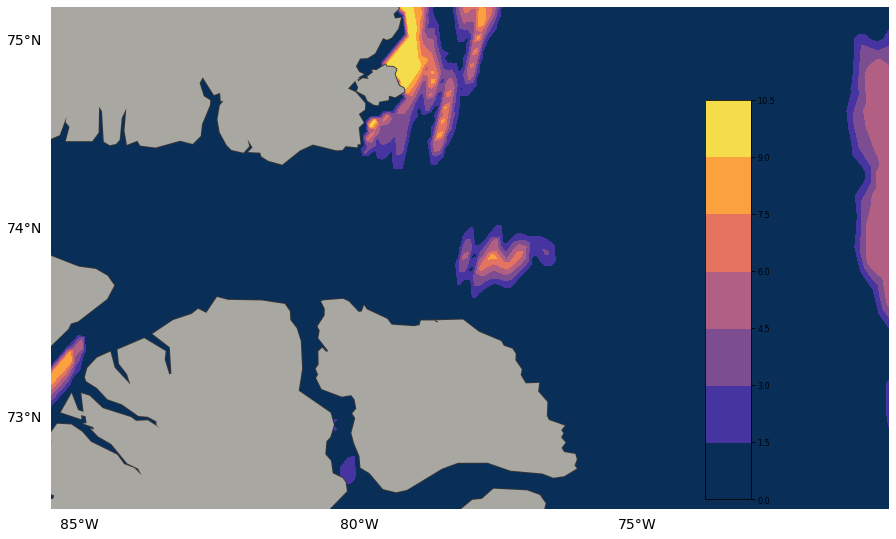

In [17]:
plot_layer(16,votkeavt)

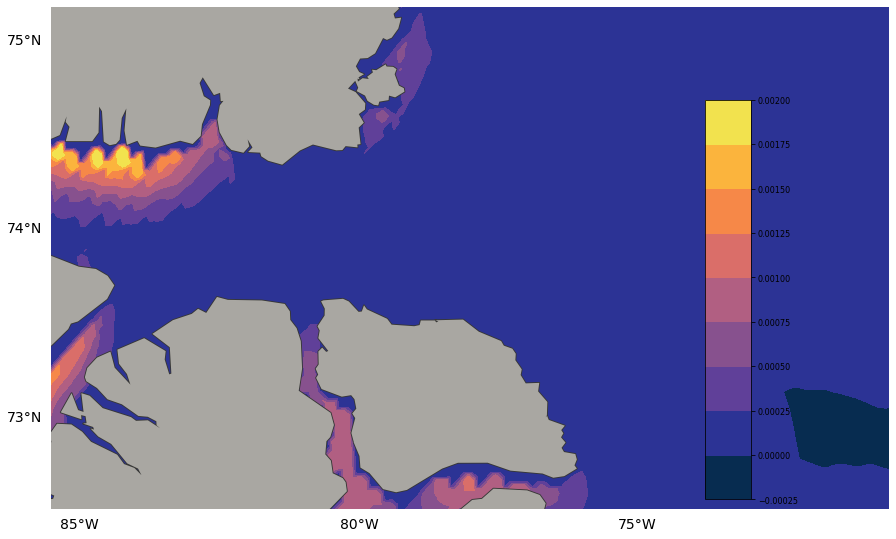

In [18]:
plot_layer(16,iiceprod)

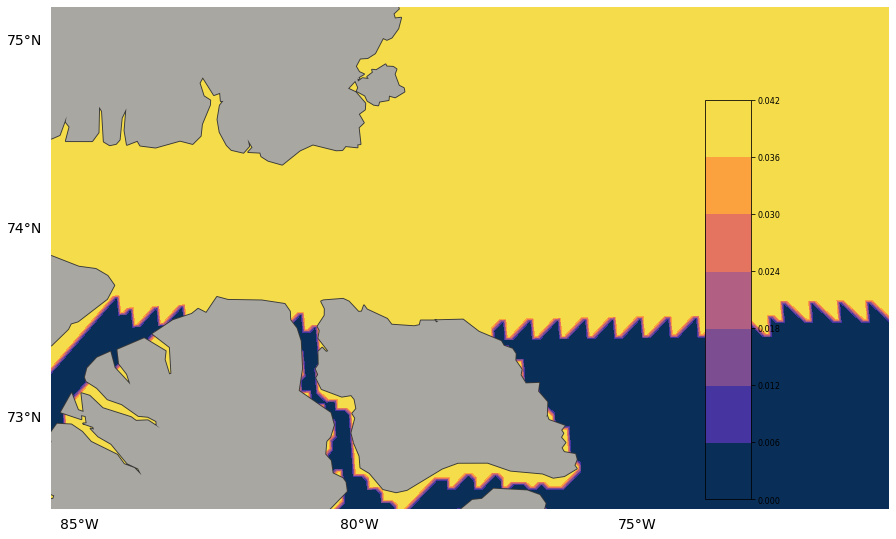

In [19]:
plot_layer(16,iicesflx)

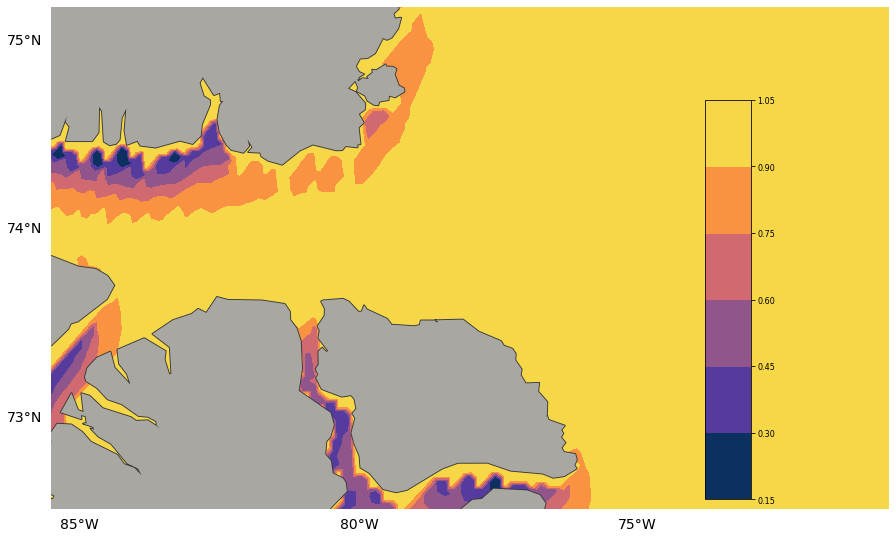

In [20]:
plot_layer(16,ileadfra)

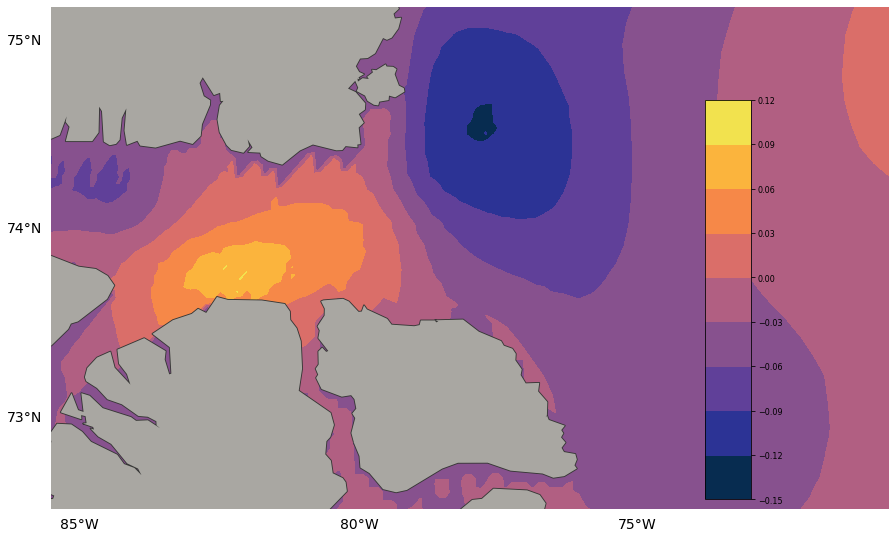

In [21]:
plot_layer(16,iwinstru)